# Analiziranje podatkov glede na težo

Naložimo ustrezne pakete

In [248]:
# naložimo pakete
import os
import pandas as pd

nov_directory = 'obdelani podatki'
csv_drzave = 'drzave.csv'
csv_kontinenti = 'kontinenti.csv'
# izberemo interaktivni "notebook" stil risanja
%matplotlib inline

pd.set_option("display.max_rows", 15)
path1 = os.path.join(nov_directory, csv_drzave) 
path2 = os.path.join(nov_directory, csv_kontinenti) 

#naložimo razpredelnico, s katero bomo delali
countries = pd.read_csv(path1)
continents = pd.read_csv(path2)

In [249]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

## 1. Splošno

### 1.1. Države

V vseh spodnjih tabelah je prikazan seznam vseh držav, ki sem jih zajela v svoji projektni nalogi. Vsebuje podatke o teži, teži in itm-ju tako moških kot žensk. V tej datoteki sem se osredotočila na analiziranje podatkov teže.

In [250]:
countries.index += 1
countries

,ime države,višina moških,teža moških,itm moških,višina žensk,teža žensk,itm žensk
1,Netherlands,1.84,87.9,26.1,1.70,73.2,25.3
2,Montenegro,1.83,90.4,27.0,1.70,75.3,26.2
3,Estonia,1.82,89.9,27.0,1.68,73.7,26.0
4,Denmark,1.82,86.8,26.3,1.69,70.2,24.6
5,Bosnia and Herzegovina,1.82,87.1,26.4,1.67,70.6,25.3
...,...,...,...,...,...,...,...
123,Nepal,1.64,60.5,22.5,1.52,51.6,22.3
124,Guatemala,1.64,69.1,25.7,1.51,61.9,27.3
125,Yemen,1.63,62.5,23.6,1.54,56.9,24.0
126,Laos,1.62,59.5,22.6,1.53,53.7,23.0


Nadaljnje tabele prikazujejo države urejene po teži. Vidimo lahko, da so izmed vseh držav najtežji moški na Cookovih otokih, ženske pa v Ameriški Samoi. Najlažji moški se po podatkih nahajajo v Vzhodnem Timorju (tam so tudi najnižji moški glede na države), kjer so tudi ženske najlažje.

In [251]:
countries.sort_values(by="teža moških", ascending = False, inplace = True)
countries
print(countries.head(5))
countries["teža moških"]

          ime države  višina moških  teža moških  itm moških  višina žensk  \
36      Cook Islands           1.78        103.7        32.7          1.67   
44    American Samoa           1.77        103.2        33.1          1.67   
47           Tokelau           1.76         99.0        32.0          1.66   
42              Niue           1.77         98.8        31.5          1.67   
35  French Polynesia           1.78         93.8        29.6          1.66   

    teža žensk  itm žensk  
36        92.8       33.3  
44        98.1       35.2  
47        92.5       33.7  
42        92.6       33.4  
35        81.3       29.5  


36     103.7
44     103.2
47      99.0
42      98.8
35      93.8
       ...  
90      58.8
120     58.4
122     57.7
109     56.5
127     53.9
Name: teža moških, Length: 127, dtype: float64

In [252]:
countries.sort_values(by="teža žensk", ascending = False, inplace = True)
countries
print(countries.head(5))
countries["teža žensk"]

        ime države  višina moških  teža moških  itm moških  višina žensk  \
44  American Samoa           1.77        103.2        33.1          1.67   
57           Tonga           1.75         93.7        30.7          1.66   
36    Cook Islands           1.78        103.7        32.7          1.67   
42            Niue           1.77         98.8        31.5          1.67   
47         Tokelau           1.76         99.0        32.0          1.66   

    teža žensk  itm žensk  
44        98.1       35.2  
57        93.1       33.9  
36        92.8       33.3  
42        92.6       33.4  
47        92.5       33.7  


44     98.1
57     93.1
36     92.8
42     92.6
47     92.5
       ... 
123    51.6
113    51.5
122    50.5
120    49.2
127    49.0
Name: teža žensk, Length: 127, dtype: float64

In [253]:
countries.sort_values(by="teža moških", ascending = True, inplace = True)
countries
print(countries.head(5))
countries["teža moških"]

     ime države  višina moških  teža moških  itm moških  višina žensk  \
127  East Timor           1.59         53.9        21.2          1.52   
109    Ethiopia           1.68         56.5        20.1          1.57   
122  Bangladesh           1.65         57.7        21.3          1.52   
120  Madagascar           1.65         58.4        21.5          1.53   
90      Eritrea           1.70         58.8        20.3          1.57   

     teža žensk  itm žensk  
127        49.0       21.2  
109        51.6       21.0  
122        50.5       21.8  
120        49.2       21.1  
90         52.2       21.1  


127     53.9
109     56.5
122     57.7
120     58.4
90      58.8
       ...  
35      93.8
42      98.8
47      99.0
44     103.2
36     103.7
Name: teža moških, Length: 127, dtype: float64

In [254]:
countries.sort_values(by="teža žensk", ascending = True, inplace = True)
countries
print(countries.head(5))
countries["teža žensk"]

     ime države  višina moških  teža moških  itm moških  višina žensk  \
127  East Timor           1.59         53.9        21.2          1.52   
120  Madagascar           1.65         58.4        21.5          1.53   
122  Bangladesh           1.65         57.7        21.3          1.52   
113     Burundi           1.67         60.5        21.8          1.55   
123       Nepal           1.64         60.5        22.5          1.52   

     teža žensk  itm žensk  
127        49.0       21.2  
120        49.2       21.1  
122        50.5       21.8  
113        51.5       21.5  
123        51.6       22.3  


127    49.0
120    49.2
122    50.5
113    51.5
123    51.6
       ... 
47     92.5
42     92.6
36     92.8
57     93.1
44     98.1
Name: teža žensk, Length: 127, dtype: float64

### 1.2. Kontinenti

Analogno kot pri državah je v spodnjih tabelah prikazan seznam delov kontinentov, ki sem jih zajela v svoji projektni nalogi. Vsebuje podatke o teži in teži tako moških kot žensk. V tej datoteki sem se osredotočila na analiziranje podatkov teže.

In [255]:
continents.index += 1
continents

,del kontinenta,višina moških,teža moških,višina žensk,teža žensk
1,Northern Africa,1.73,77.9,1.61,73.7
2,Eastern Africa,1.67,60.1,1.57,56.2
3,Western Africa,1.70,64.9,1.59,60.1
4,Southern Africa,1.69,71.2,1.59,73.2
5,Central Africa,1.69,62.6,1.58,58.0
...,...,...,...,...,...
18,Northern Europe,1.79,87.1,1.65,72.3
19,Eastern Europe,1.78,83.8,1.65,72.2
20,Polynesia,1.76,93.8,1.65,87.3
21,Melanesia,1.64,68.1,1.57,64.6


Nadaljnje tabele prikazujejo dele kontinentov urejene po teži. Vidimo lahko, da so najtežji moški v Polineziji in enako velja za ženske. Najlažji moški se po podatkih nahajajo v vzhodni Afriki, ženske pa v južni Aziji (tam so tudi najnižje ženske glede na dele kontinentov).        

In [256]:
continents.sort_values(by="teža moških", ascending = False, inplace = True)
continents
print(continents.head(5))
continents["teža moških"]

           del kontinenta  višina moških  teža moških  višina žensk  \
20              Polynesia           1.76         93.8          1.65   
7           North America           1.77         90.2          1.63   
15  Australia/New Zealand           1.78         88.4          1.65   
18        Northern Europe           1.79         87.1          1.65   
16         Western Europe           1.80         86.1          1.66   

    teža žensk  
20        87.3  
7         76.6  
15        73.1  
18        72.3  
16        69.2  


20    93.8
7     90.2
15    88.4
18    87.1
16    86.1
      ... 
3     64.9
14    62.8
5     62.6
12    60.9
2     60.1
Name: teža moških, Length: 22, dtype: float64

In [257]:
continents.sort_values(by="teža žensk", ascending = False, inplace = True)
continents
print(continents.head(5))
continents["teža žensk"]

     del kontinenta  višina moških  teža moških  višina žensk  teža žensk
20        Polynesia           1.76         93.8          1.65        87.3
22       Micronesia           1.69         82.7          1.59        78.9
7     North America           1.77         90.2          1.63        76.6
1   Northern Africa           1.73         77.9          1.61        73.7
4   Southern Africa           1.69         71.2          1.59        73.2


20    87.3
22    78.9
7     76.6
1     73.7
4     73.2
      ... 
3     60.1
5     58.0
14    56.7
2     56.2
12    54.0
Name: teža žensk, Length: 22, dtype: float64

In [258]:
continents.sort_values(by="teža moških", ascending = True, inplace = True)
continents
print(continents.head(5))
continents["teža moških"]

    del kontinenta  višina moških  teža moških  višina žensk  teža žensk
2   Eastern Africa           1.67         60.1          1.57        56.2
12      South Asia           1.66         60.9          1.55        54.0
5   Central Africa           1.69         62.6          1.58        58.0
14  Southeast Asia           1.67         62.8          1.55        56.7
3   Western Africa           1.70         64.9          1.59        60.1


2     60.1
12    60.9
5     62.6
14    62.8
3     64.9
      ... 
16    86.1
18    87.1
15    88.4
7     90.2
20    93.8
Name: teža moških, Length: 22, dtype: float64

In [259]:
continents.sort_values(by="teža žensk", ascending = True, inplace = True)
continents
print(continents.head(5))
continents["teža žensk"]

    del kontinenta  višina moških  teža moških  višina žensk  teža žensk
12      South Asia           1.66         60.9          1.55        54.0
2   Eastern Africa           1.67         60.1          1.57        56.2
14  Southeast Asia           1.67         62.8          1.55        56.7
5   Central Africa           1.69         62.6          1.58        58.0
3   Western Africa           1.70         64.9          1.59        60.1


12    54.0
2     56.2
14    56.7
5     58.0
3     60.1
      ... 
4     73.2
1     73.7
7     76.6
22    78.9
20    87.3
Name: teža žensk, Length: 22, dtype: float64

## 2. Podtabela

### 2.1. Države

In [260]:
podtabela1 = countries[["ime države", "višina moških", "teža moških", "itm moških", "višina žensk", "teža žensk", "itm žensk"]]
podtabela1

,ime države,višina moških,teža moških,itm moških,višina žensk,teža žensk,itm žensk
127,East Timor,1.59,53.9,21.2,1.52,49.0,21.2
120,Madagascar,1.65,58.4,21.5,1.53,49.2,21.1
122,Bangladesh,1.65,57.7,21.3,1.52,50.5,21.8
113,Burundi,1.67,60.5,21.8,1.55,51.5,21.5
123,Nepal,1.64,60.5,22.5,1.52,51.6,22.3
...,...,...,...,...,...,...,...
47,Tokelau,1.76,99.0,32.0,1.66,92.5,33.7
42,Niue,1.77,98.8,31.5,1.67,92.6,33.4
36,Cook Islands,1.78,103.7,32.7,1.67,92.8,33.3
57,Tonga,1.75,93.7,30.7,1.66,93.1,33.9


### 2.2. Kontinenti

In [261]:
podtabela2 = continents[["del kontinenta", "višina moških", "teža moških", "višina žensk", "teža žensk"]]
podtabela2

,del kontinenta,višina moških,teža moških,višina žensk,teža žensk
12,South Asia,1.66,60.9,1.55,54.0
2,Eastern Africa,1.67,60.1,1.57,56.2
14,Southeast Asia,1.67,62.8,1.55,56.7
5,Central Africa,1.69,62.6,1.58,58.0
3,Western Africa,1.70,64.9,1.59,60.1
...,...,...,...,...,...
4,Southern Africa,1.69,71.2,1.59,73.2
1,Northern Africa,1.73,77.9,1.61,73.7
7,North America,1.77,90.2,1.63,76.6
22,Micronesia,1.69,82.7,1.59,78.9


## 3. Grafi in razni izračuni

### 3.1. Države

#### 3.1.1. Primerjava prvih in zadnjih 10 držav

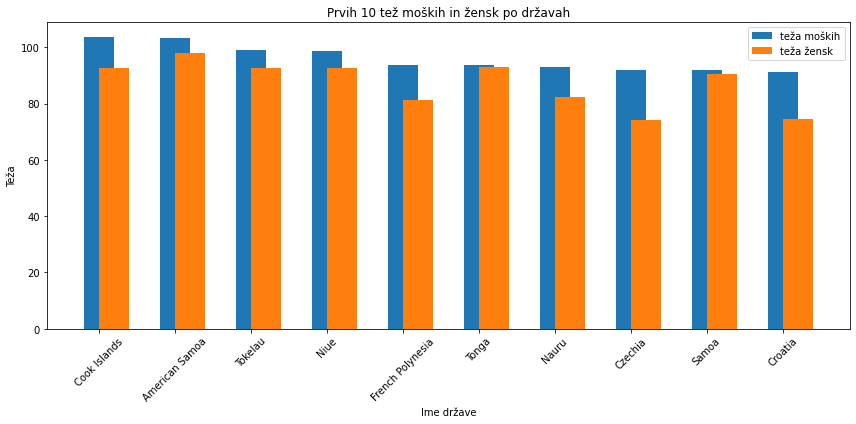

In [262]:
top_10_male_weights = countries.groupby('ime države')['teža moških'].mean().nlargest(10)
female_weights = countries.groupby('ime države')['teža žensk'].mean()

female_weights_sorted = female_weights[top_10_male_weights.index] # priredimo desetim največjim moškim težam ustrezne ženske teže

plt.figure(figsize=(12, 6))

plt.bar(top_10_male_weights.index, top_10_male_weights, width=0.4, label='teža moških')
plt.bar(top_10_male_weights.index, female_weights_sorted, width=0.4, align='edge', label='teža žensk')

plt.xlabel('Ime države')
plt.ylabel('Teža')
plt.title('Prvih 10 tež moških in žensk po državah')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


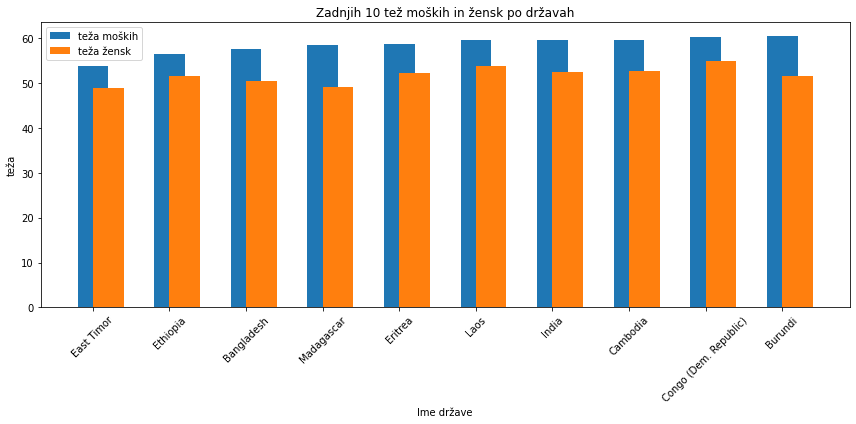

In [263]:
bottom_10_male_weights = countries.groupby('ime države')['teža moških'].mean().nsmallest(10)
female_weights = countries.groupby('ime države')['teža žensk'].mean()

female_weights_sorted = female_weights[bottom_10_male_weights.index]

plt.figure(figsize=(12, 6))

plt.bar(bottom_10_male_weights.index, bottom_10_male_weights, width=0.4, label='teža moških')
plt.bar(bottom_10_male_weights.index, female_weights_sorted, width=0.4, align='edge', label='teža žensk')

plt.xlabel('Ime države')
plt.ylabel('teža')
plt.title('Zadnjih 10 tež moških in žensk po državah')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


#### 3.1.2. Razlike tež med spoloma

Naslednji računi prikazujejo, kolikšna je povprečna teža moškega in ženske glede na obravnavane države, za koliko se ti dve vrednosti razlikujeta in za kolikšen delež so povprečno moški težji od žensk ter kje se pojavi največja razlika med spoloma in kolikšna je. Opazimo, da so moški povprečno težki 78.92 kg, ženske 68.92 kg, da so moški v primerjavi z ženskami za 10 kg težji in da so moški po državah povprečno 14.51 % težji od žensk. Največja razlika med težo moških in žensk je se je izkazala Švici in znaša 21.6 kg.



In [264]:
average_world_male_weight = round(np.mean(podtabela1["teža moških"]), 2)
average_world_female_weight = round(np.mean(podtabela1["teža žensk"]), 2)

print("Povprečna teža moškega glede na vse države je", average_world_male_weight, "kg.")
print("Povprečna teža ženske glede na vse države je", average_world_female_weight, "kg.")


Povprečna teža moškega glede na vse države je 78.92 kg.
Povprečna teža ženske glede na vse države je 68.92 kg.


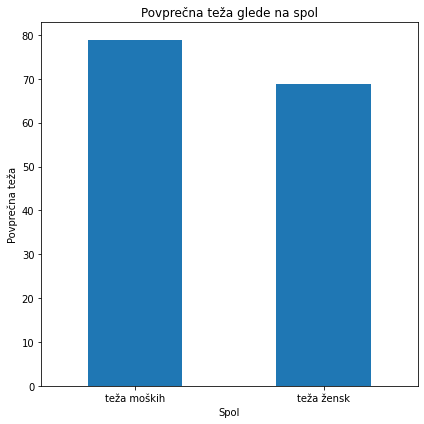

In [265]:
average_weight = podtabela1[["teža moških", "teža žensk"]].mean()

plt.figure(figsize=(6, 6))
average_weight.plot(kind="bar")
plt.xlabel("Spol")
plt.ylabel("Povprečna teža")
plt.title("Povprečna teža glede na spol")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Koliko so moški težji od žensk?

In [266]:
rounded_weight_difference = round(average_world_male_weight - average_world_female_weight, 2)

print("Razlika med težo moških in žensk je", rounded_weight_difference, "kg.")


Razlika med težo moških in žensk je 10.0 kg.


In [267]:
percentage_men_taller = (rounded_weight_difference / average_world_female_weight) * 100

print("Moški so po državah povprečno", round(percentage_men_taller, 2), "% težji od žensk.")


Moški so po državah povprečno 14.51 % težji od žensk.


Kolikšne so največje razlike med ITM vrednostmi in v katerih državah so?

In [268]:
podtabela1["weight_difference"] = abs(podtabela1["teža moških"] - podtabela1["teža žensk"])
countries_ordered_by_weight_difference = podtabela1.sort_values(by="weight_difference", ascending=False)

countries_and_weight_differences = countries_ordered_by_weight_difference[["ime države", "weight_difference"]]

print("Tabela držav z največjimi razlikami tež:")
print(countries_and_weight_differences)

Tabela držav z največjimi razlikami tež:
     ime države  weight_difference
25  Switzerland               21.6
9      Slovakia               18.2
49        Spain               18.1
7       Czechia               17.7
15       Poland               17.5
..          ...                ...
69        Samoa                1.3
57        Tonga                0.6
39      Grenada                0.6
96     Zimbabwe                0.3
20     Dominica                0.1

[127 rows x 2 columns]


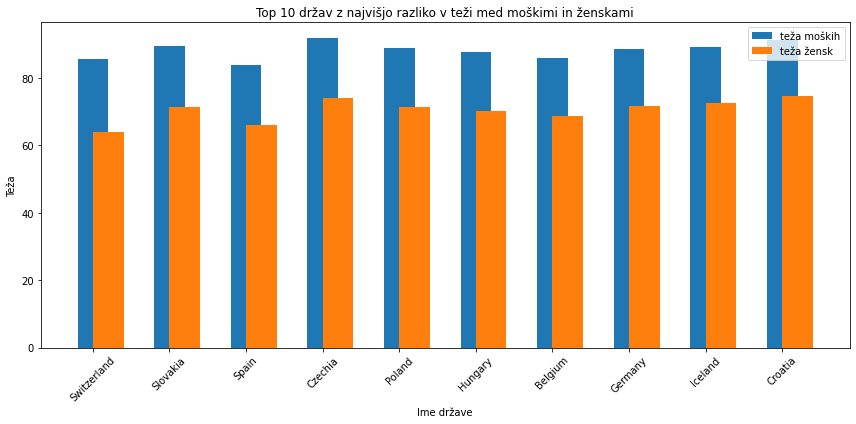

In [269]:
plt.figure(figsize=(12, 6))

plt.bar(countries_ordered_by_weight_difference["ime države"].head(10), countries_ordered_by_weight_difference["teža moških"].head(10), width=0.4, label='teža moških')
plt.bar(countries_ordered_by_weight_difference["ime države"].head(10), countries_ordered_by_weight_difference["teža žensk"].head(10), width=0.4, align='edge', label='teža žensk')

plt.xlabel('Ime države')
plt.ylabel('Teža')
plt.title('Top 10 držav z najvišjo razliko v teži med moškimi in ženskami')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [270]:
max_weight_difference = round(np.max(np.abs(podtabela1["teža moških"] - podtabela1["teža žensk"])), 2)

#poiščemo vrstico
max_weight_row = podtabela1.loc[np.abs(podtabela1["teža moških"] - podtabela1["teža žensk"]).idxmax()]

# poiščemo državo
country_with_max_weight_difference = max_weight_row["ime države"]

print("Največja razlika med težo moških in žensk je", max_weight_difference, "kg.")
print("Ta razlika je prisotna na območju:", country_with_max_weight_difference)


Največja razlika med težo moških in žensk je 21.6 kg.
Ta razlika je prisotna na območju: Switzerland


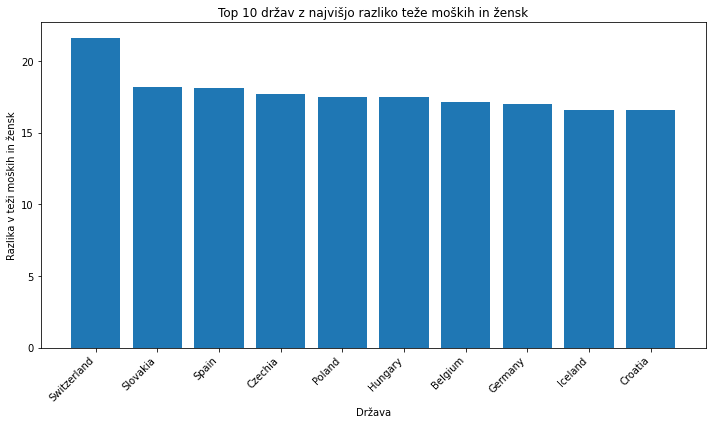

In [271]:
plt.figure(figsize=(10, 6))
plt.bar(countries_ordered_by_weight_difference["ime države"].head(10), countries_ordered_by_weight_difference["weight_difference"].head(10))
plt.xlabel("Država")
plt.ylabel("Razlika v teži moških in žensk")
plt.title("Top 10 držav z najvišjo razliko teže moških in žensk")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

### 3.2. Kontinenti

#### 3.2.1. Primerjava prvih in zadnjih 10 delov kontinentov

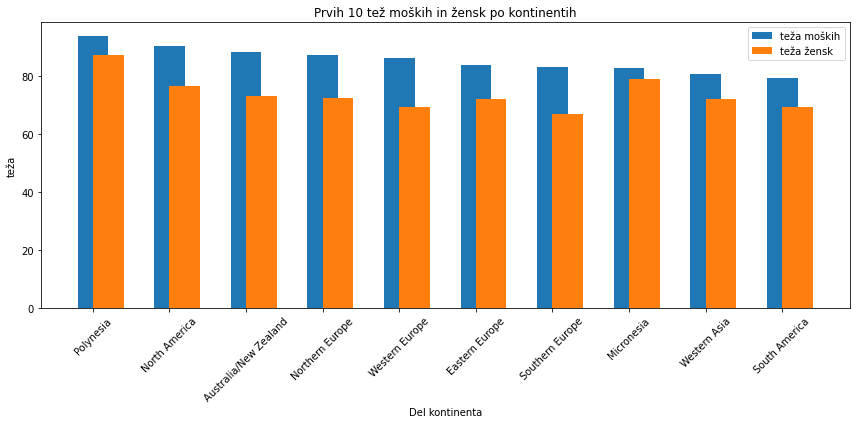

In [272]:
top_10_male_weights_continents = continents.groupby('del kontinenta')['teža moških'].mean().nlargest(10)
female_weights_continents = continents.groupby('del kontinenta')['teža žensk'].mean()

female_weights_sorted_continents = female_weights_continents[top_10_male_weights_continents.index] # priredimo desetim največjim moškim težam ustrezne ženske teže

plt.figure(figsize=(12, 6))

plt.bar(top_10_male_weights_continents.index, top_10_male_weights_continents, width=0.4, label='teža moških')
plt.bar(top_10_male_weights_continents.index, female_weights_sorted_continents, width=0.4, align='edge', label='teža žensk')

plt.xlabel('Del kontinenta')
plt.ylabel('teža')
plt.title('Prvih 10 tež moških in žensk po kontinentih')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

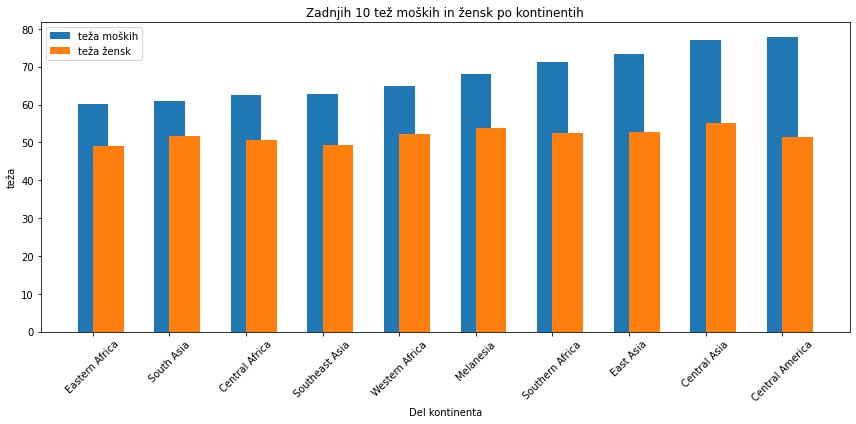

In [273]:
bottom_10_male_weights_continents = continents.groupby('del kontinenta')['teža moških'].mean().nsmallest(10)
female_weights_continents = continents.groupby('del kontinenta')['teža žensk'].mean()

female_weights_sorted_continents = female_weights[bottom_10_male_weights.index]

plt.figure(figsize=(12, 6))

plt.bar(bottom_10_male_weights_continents.index, bottom_10_male_weights_continents, width=0.4, label='teža moških')
plt.bar(bottom_10_male_weights_continents.index, female_weights_sorted_continents, width=0.4, align='edge', label='teža žensk')

plt.xlabel('Del kontinenta')
plt.ylabel('teža')
plt.title('Zadnjih 10 tež moških in žensk po kontinentih')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


#### 3.2.2. Razlike tež med spoloma

Analogno kot pri državah sem naredila račune, kolikšna je povprečna teža moškega in ženske glede na dele kontinentov, za koliko se ti dve vrednosti razlikujeta in za kolikšen delež so povprečno moški težji od žensk ter kje se pojavi največja razlika med spoloma in kolikšna je. Opazimo, da so moški povprečno težki 76.85 kg, ženske 68.34 kg, da so moški v primerjavi z ženskami za 8.51 kg težji in da so moški po državah povprečno 12.45 % težji od žensk. Največja razlika med težo moških in žensk je se je izkazala v vzhodni Afriki in znaša 16.9 kg (tam je bila tudi največja razlika med višino moških in žensk).



In [274]:
average_world_male_weight_c = round(np.mean(podtabela2["teža moških"]), 2)
average_world_female_weight_c = round(np.mean(podtabela2["teža žensk"]), 2)

print("Povprečna teža moškega glede na kontinente je", average_world_male_weight_c, "kg.")
print("Povprečna teža ženske glede na kontinente je", average_world_female_weight_c, "kg.")

Povprečna teža moškega glede na kontinente je 76.85 kg.
Povprečna teža ženske glede na kontinente je 68.34 kg.


Koliko so moški težji od žensk?

In [275]:
rounded_weight_difference_c = round(average_world_male_weight_c - average_world_female_weight_c, 2)

print("Razlika med težo moških in žensk je", rounded_weight_difference_c, "kg.")


Razlika med težo moških in žensk je 8.51 kg.


In [276]:
percentage_men_taller_c = (rounded_weight_difference_c / average_world_female_weight_c) * 100

print("Moški so po kontinentih povprečno", round(percentage_men_taller_c, 2), "% težji od žensk.")

Moški so po kontinentih povprečno 12.45 % težji od žensk.


Kje je največja razlika med moškimi in ženskami in kolikšna je?

In [277]:
max_weight_difference_c = round(np.max(np.abs(podtabela2["teža moških"] - podtabela2["teža žensk"])), 2)

#poiščemo vrstico
max_weight_row_c = podtabela2.loc[np.abs(podtabela1["teža moških"] - podtabela2["teža žensk"]).idxmax()]

# poiščemo državo
continent_with_max_weight_difference = max_weight_row_c["del kontinenta"]

print("Največja razlika med težo moških in žensk je", max_weight_difference_c, "kg.")
print("Ta razlika je prisotna na območju:", continent_with_max_weight_difference)


Največja razlika med težo moških in žensk je 16.9 kg.
Ta razlika je prisotna na območju: Eastern Africa
